<a href="https://colab.research.google.com/github/AklimaRimi/Reptile-Museum/blob/main/train_a_model_onnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/AklimaRimi/Reptile-Museum.git

Cloning into 'Reptile-Museum'...
remote: Enumerating objects: 39830, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 39830 (delta 26), reused 32 (delta 6), pack-reused 39748
Receiving objects: 100% (39830/39830), 844.88 MiB | 29.65 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Updating files: 100% (51507/51507), done.


In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr onnxruntime onnx nbdev
   

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -Uq fastkaggle

from fastkaggle import *

In [ ]:
!nvidia-smi

Fri Mar 10 17:24:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:

from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import pandas as pd
import numpy as np
import torch
from fastai.metrics import accuracy
torch.cuda.is_available()
from fastai.vision.all import *
set_seed(42)

from fastcore.parallel import *

In [ ]:
df = pd.read_csv('/content/Reptile-Museum/data/final_data.csv')
df.head()

,Image,Type,Name,Scientific Name,Conservation Status,Habitant,Color,Found In,Diet
0,Reptile-Museum/augimg/Rafetus swinhoei/yRafetus swinhoei85.jpeg,Turtle,Yangtze giant softshell turtle,Rafetus swinhoei,Critically Endangered,River,Olive-Green,China,Omnivore
1,Reptile-Museum/augimg/Scelarcis perspicillata/dScelarcis perspicillata4.jpeg,Lizard,Moroccan rock lizard,Scelarcis perspicillata,Low Risk,Desert,Brown,Morocco,Insectivore
2,Reptile-Museum/augimg/Thamnophis sirtalis parietalis/yThamnophis sirtalis parietalis57.jpeg,Snake,Red-sided garter snake,Thamnophis sirtalis parietalis,Low Risk,Wet Lands,Brown,North America,Carnivore
3,Reptile-Museum/augimg/Caretta caretta/xCaretta caretta82.jpeg,Turtle,Loggerhead sea turtle,Caretta caretta,Low Risk,Ocean,Brown,All Over the World,Carnivore
4,Reptile-Museum/augimg/Mecistops cataphractus/yMecistops cataphractus67.jpeg,Crocodile,West African Slender-snouted crocodile,Mecistops cataphractus,Critically Endangered,Tropical Region,Dark-Brown,Angola,Carnivore


In [ ]:
path = '/content/'

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from fastai.vision.all import *

path = '/content/'


labels = pd.read_csv('/content/Reptile-Museum/data/final_data.csv')


with tf.device('/device:GPU:0'):
  def get_labels(row):
      return [row['Scientific Name'], row['Name'], row['Type'], row['Conservation Status'],row['Habitant'],row['Color'],row['Found In'],row['Diet']]
  def get_inp(row):
    return row['Image']

  dblock = DataBlock(
        blocks=(ImageBlock, MultiCategoryBlock(add_na = True)),
                      splitter=RandomSplitter(valid_pct=.2,seed=0),
                      get_x=get_inp,
                      get_y=get_labels,
                      item_tfms=Resize(300),
                      
      )
  dls = dblock.dataloaders(labels, bs=16)




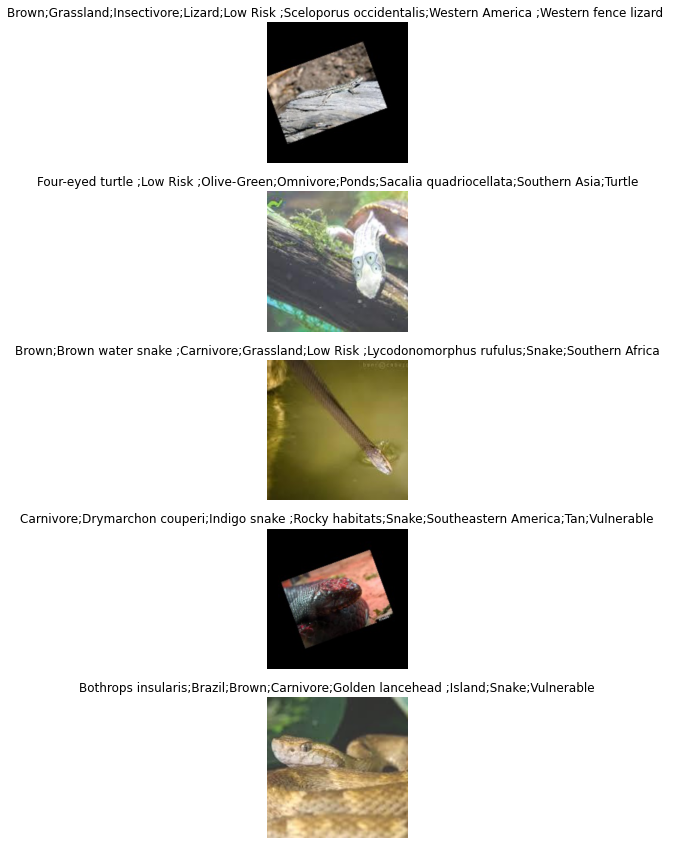

In [ ]:
with tf.device('/device:GPU:0'):
  dls.train.show_batch(max_n=5,nrows=5)

In [ ]:
with tf.device('/device:GPU:0'):
  learn = cnn_learner(dls, resnet50, metrics=[accuracy_multi, F1ScoreMulti(),PrecisionMulti()]).to_fp16()



/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pt

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
learn.freeze()

SuggestedLRs(valley=0.002511886414140463)

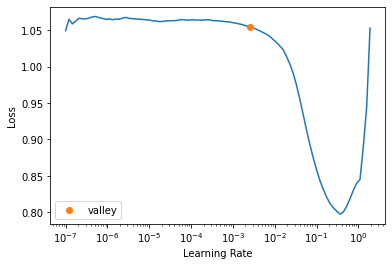

In [ ]:
learn.lr_find()

In [ ]:
with tf.device('/device:GPU:0'):
  learn.fit_one_cycle(1,0.002511886414140463)



epoch,train_loss,valid_loss,accuracy_multi,f1_score,precision_score,time
0,0.034074,0.023782,0.990862,0.657991,0.852507,06:52


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
learn.unfreeze()

SuggestedLRs(valley=0.00013182566908653826)

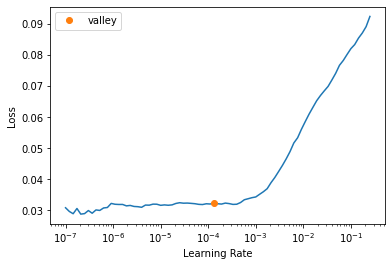

In [ ]:
learn.lr_find()

In [ ]:
with tf.device('/device:GPU:0'):
  learn.fit_one_cycle(5,0.00013182566908653826)

epoch,train_loss,valid_loss,accuracy_multi,f1_score,precision_score,time
0,0.032012,0.022725,0.991547,0.669650,0.865250,08:06
1,0.021220,0.014791,0.994466,0.789298,0.920416,08:14
2,0.013378,0.008193,0.997037,0.889412,0.955829,08:16
3,0.007832,0.004710,0.998263,0.938817,0.967324,08:14
4,0.005726,0.004290,0.998428,0.945364,0.968590,08:13


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_cl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


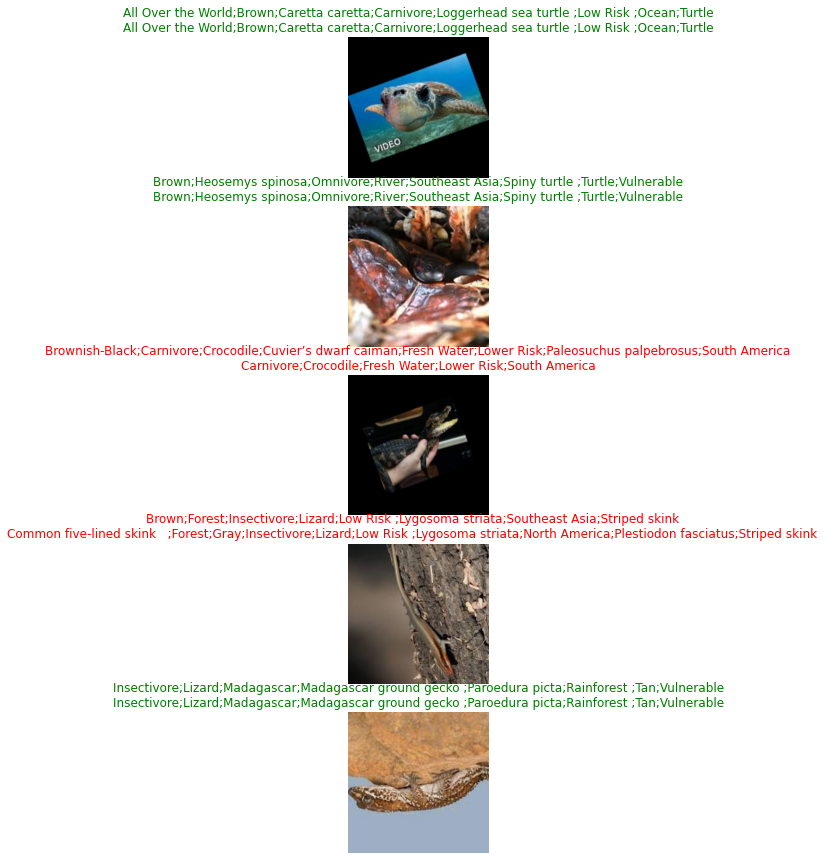

In [ ]:
with tf.device('/device:GPU:0'):  
  learn.show_results(figsize=(15,15),max_n=5,nrows=5)

In [ ]:
import pickle
with tf.device('/device:GPU:0'):
  learn.export('/content/drive/MyDrive/Multimodal/multi-target/model/multi_target_resnet50.pkl')

In [ ]:
from fastai.vision.all import *
with tf.device('/device:GPU:0'):
  learn  =  load_learner('/content/drive/MyDrive/Multimodal/multi-target/model/multi_target_resnet50.pkl')
  preds = learn.predict('/content/Reptile-Museum/augimg/Caretta caretta/xCaretta caretta82.jpeg')

  print(preds[0])


['All Over the World', 'Brown', 'Caretta caretta', 'Carnivore', 'Loggerhead sea turtle ', 'Low Risk ', 'Ocean', 'Turtle']


In [ ]:

dummy_input = torch.randn(1, 3, 300, 300)
torch.onnx.export(learn.model, dummy_input, '/content/drive/MyDrive/Multimodal/multi-target/model/model.onnx', opset_version=14)

In [ ]:
import onnx

onnx_model = onnx.load('/content/drive/MyDrive/Multimodal/multi-target/model/model.onnx')

onnx.checker.check_model(onnx_model)

In [ ]:
import onnxruntime
from onnxruntime import *
from onnxruntime.quantization import quantize_dynamic, QuantType

ort_session = onnxruntime.InferenceSession('/content/drive/MyDrive/Multimodal/multi-target/model/model.onnx')
quantized_model_path = '/content/drive/MyDrive/Multimodal/multi-target/model/quantized_model.onnx'
quantize_dynamic(
    '/content/drive/MyDrive/Multimodal/multi-target/model/model.onnx',
    quantized_model_path,
    weight_type=QuantType.QUInt8,
)
    